In [4]:
import csv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from astropy import modeling
from IPython.display import Image

In [5]:
def readCSV(Filename):
    with open (Filename) as f:
        reader = csv.DictReader(f)
        Counts = [int(row['Counts']) for row in reader]
        Channels = list(range(1, len(Counts)+1))
        return Channels, Counts

In [7]:
def plot (X, Y):
    plt.plot(X, Y, linewidth=2)

def processPeak(Channels, Counts, PeaksX, Idx, RHeight):
    WidthsHalf, _, LeftIps ,RightIps = sp.signal.peak_widths(Counts, PeaksX, rel_height=RHeight)
    ForGaussX = Channels[int(LeftIps[Idx]) : int(RightIps[Idx])]
    ForGaussY = Counts[int(LeftIps[Idx]) : int(RightIps[Idx])]
    Xdata, Ydata = np.asarray([i for i in range (-len(ForGaussX)//2, len(ForGaussX)//2)]), np.asarray(ForGaussY)
    def Gauss(x, A, B): 
        return A*np.exp(-1*B*x**2)
    Params, Covariance = sp.optimize.curve_fit(Gauss, Xdata, Ydata) 
    FitA = Params[0] 
    FitB = Params[1] 
    N = 0
    while Gauss(N, FitA, FitB) > 1:
        N += 1
    FitY = Gauss(np.asarray([i for i in range (-N, N)]), FitA, FitB)
    X = [PeaksX[Idx] + i for i in range (-N, N)]
        
    plot(X, FitY)
    return max(FitY)
def printPeaks(X, Y):
    for i in range(len(X)):
        print (f"Peak #{i}:\nChannel = {X[i]}, Count = {int(Y[i])}")

/tmp/ipykernel_6013/272685087.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


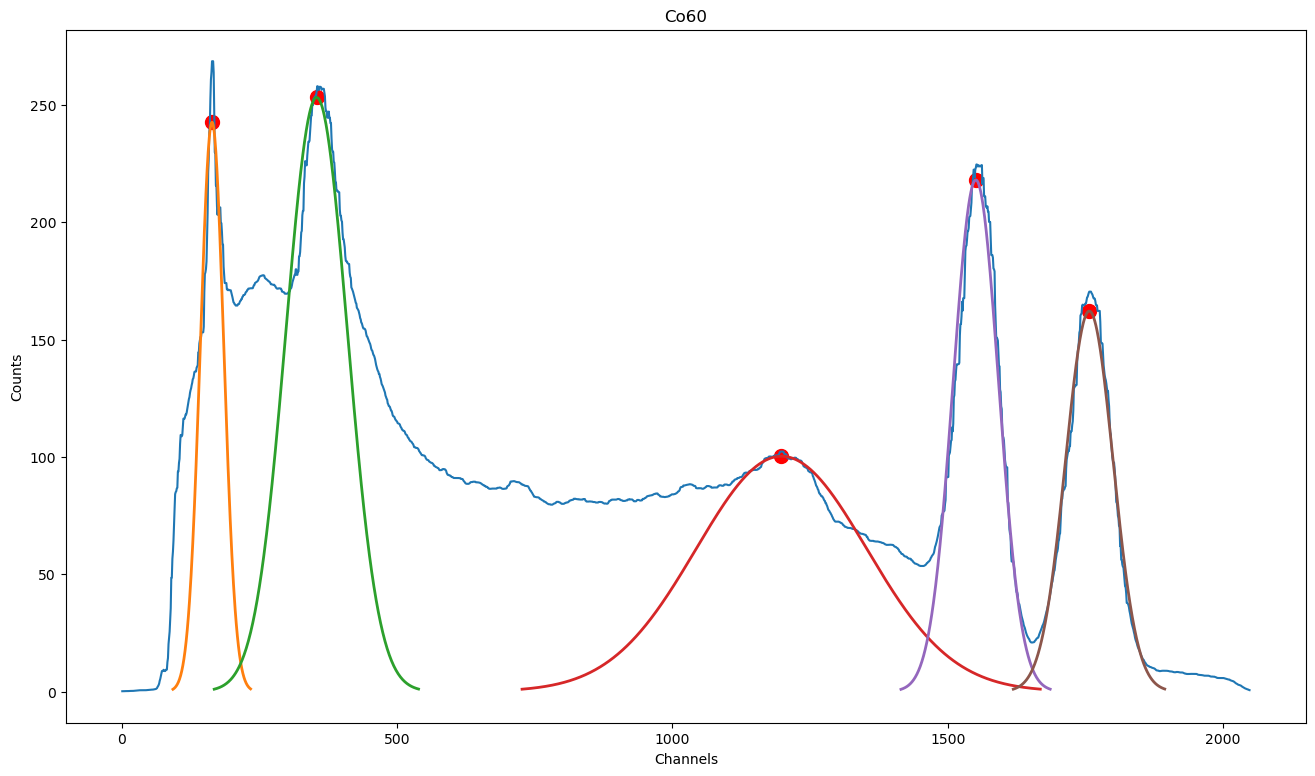

Peak #0:
Channel = 164, Count = 242
Peak #1:
Channel = 354, Count = 253
Peak #2:
Channel = 1198, Count = 100
Peak #3:
Channel = 1551, Count = 218
Peak #4:
Channel = 1757, Count = 162


In [67]:
Channels, Counts = readCSV('co60.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)

plt.figure(figsize=[16, 9])
plt.title("Co60")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=20, width=30)
Maxes = []
Maxes.append(processPeak(Channels, Counts, PeaksX, 0, 0.33))
Maxes.append(processPeak(Channels,Counts, PeaksX,1, 0.9))
Maxes.append(processPeak(Channels,Counts, PeaksX,2, 0.5))
Maxes.append(processPeak(Channels,Counts, PeaksX,3, 0.9))
Maxes.append(processPeak(Channels,Counts, PeaksX,4, 1.0))
plt.scatter(PeaksX, Maxes, color='red', s=100)
plt.savefig('Co60.png')
plt.show()
printPeaks(PeaksX, Maxes)

/tmp/ipykernel_31551/272685087.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


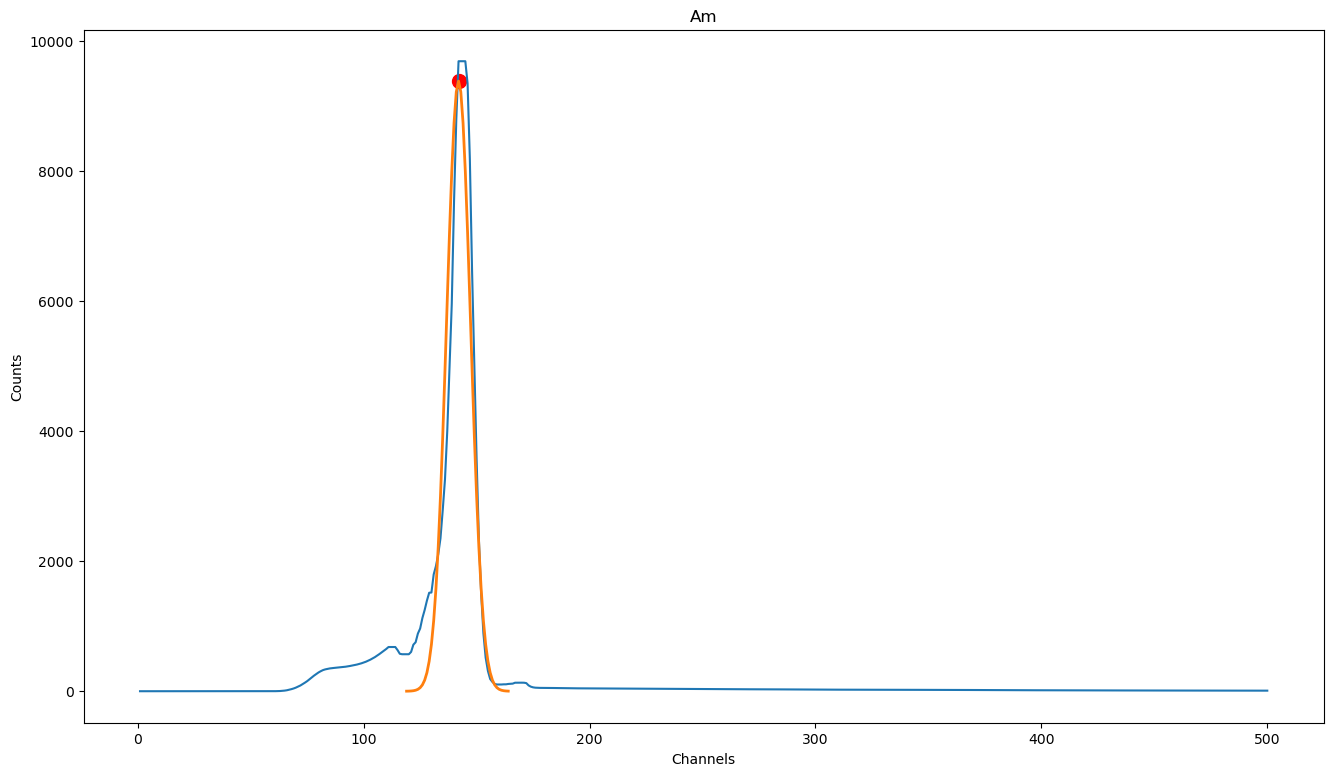

Peak #0:
Channel = 142, Count = 9384


In [355]:
Channels, Counts = readCSV('Am.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)
Channels, Counts= Channels[:500], Counts[:500]

plt.figure(figsize=[16, 9])
plt.title("Am")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=20, width=10)
Maxes = []
Maxes.append(processPeak(Channels,Counts, PeaksX, 0, 0.8))
plt.scatter(PeaksX, Maxes, color='red', s=100)
plt.savefig('Am.png')
plt.show()
printPeaks(PeaksX, Maxes)

/tmp/ipykernel_31551/272685087.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


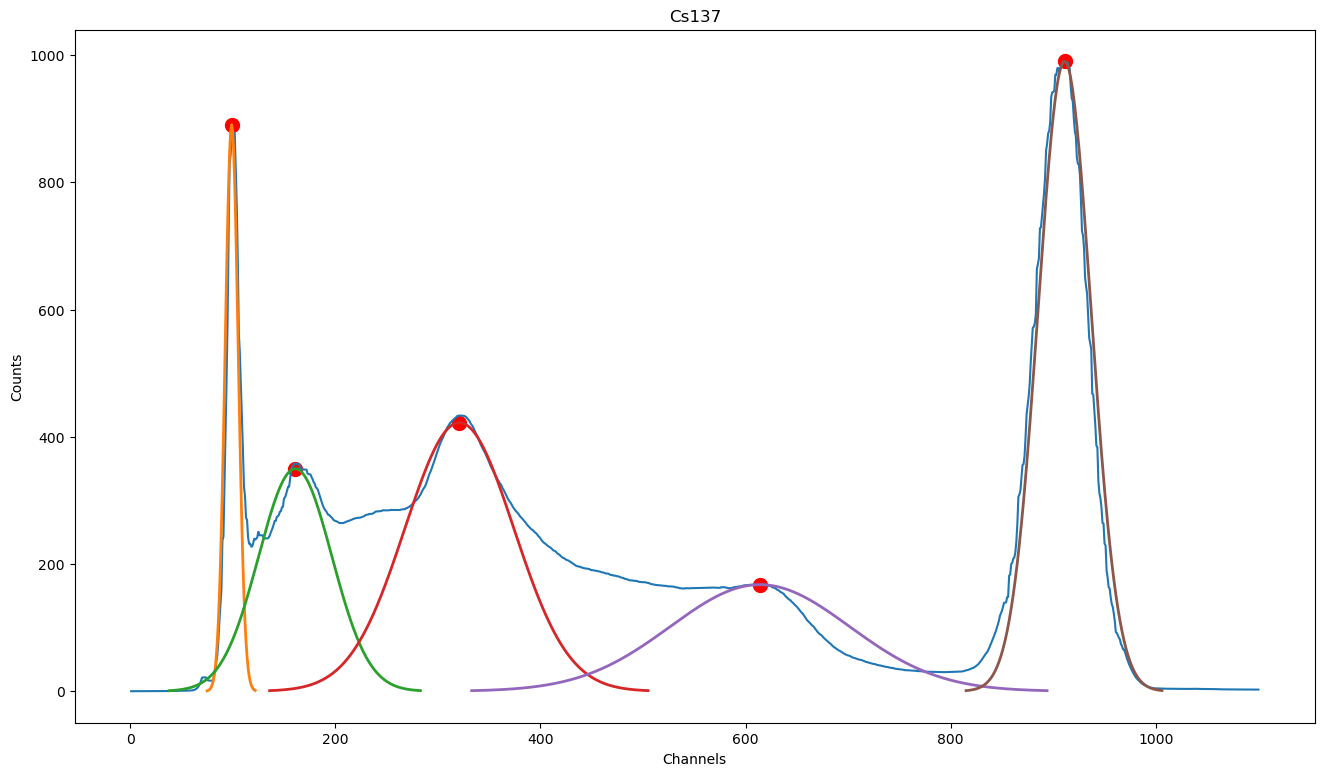

Peak #0:
Channel = 99, Count = 890
Peak #1:
Channel = 161, Count = 349
Peak #2:
Channel = 321, Count = 422
Peak #3:
Channel = 614, Count = 167
Peak #4:
Channel = 911, Count = 990


In [356]:
Channels, Counts = readCSV('cs137.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)
Channels, Counts= Channels[:1100], Counts[:1100]

plt.figure(figsize=[16, 9])
plt.title("Cs137")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=5, width=10)
Maxes = []
Maxes.append(processPeak(Channels,Counts, PeaksX, 0, 0.6))
Maxes.append(processPeak(Channels,Counts, PeaksX, 1, 0.95))
Maxes.append(processPeak(Channels,Counts, PeaksX, 2, 0.7))
Maxes.append(processPeak(Channels,Counts, PeaksX, 3, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 4, 0.8))
plt.scatter(PeaksX, Maxes, color='red', s=100)
plt.savefig('Cs137.png')
plt.show()
printPeaks(PeaksX, Maxes)

/tmp/ipykernel_6013/272685087.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


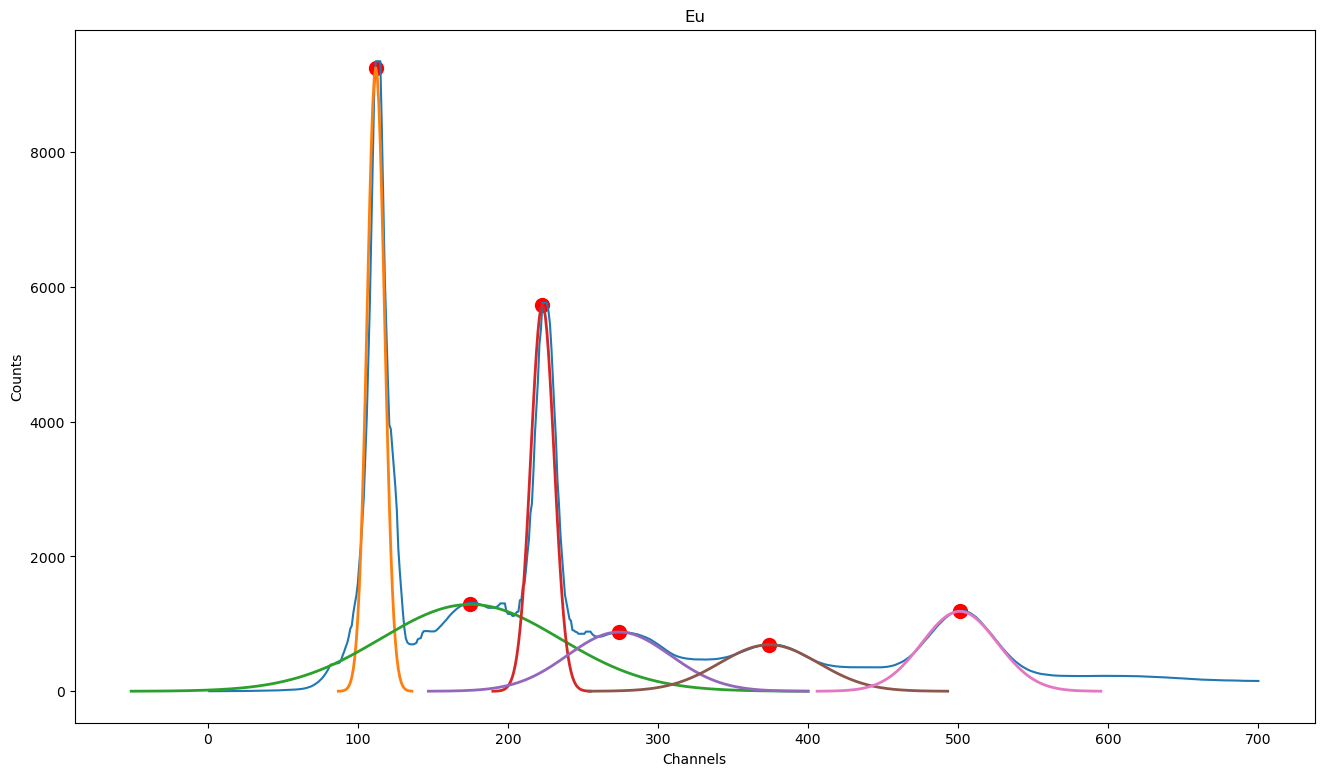

Peak #0:
Channel = 112, Count = 9248
Peak #1:
Channel = 175, Count = 1288
Peak #2:
Channel = 223, Count = 5736
Peak #3:
Channel = 274, Count = 878
Peak #4:
Channel = 374, Count = 690
Peak #5:
Channel = 501, Count = 1185


In [11]:
Channels, Counts = readCSV('Eu.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)
Channels, Counts= Channels[:700], Counts[:700]

plt.figure(figsize=[16, 9])
plt.title("Eu")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=10, width=10)
Maxes = []
Maxes.append(processPeak(Channels,Counts, PeaksX, 0, 0.6))
Maxes.append(processPeak(Channels,Counts, PeaksX, 1, 0.7))
Maxes.append(processPeak(Channels,Counts, PeaksX, 2, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 3, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 4, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 5, 0.8))
plt.scatter(PeaksX, Maxes, color='red', s=100)
plt.savefig('Eu.png')
plt.show()
printPeaks(PeaksX, Maxes)

/tmp/ipykernel_6013/272685087.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


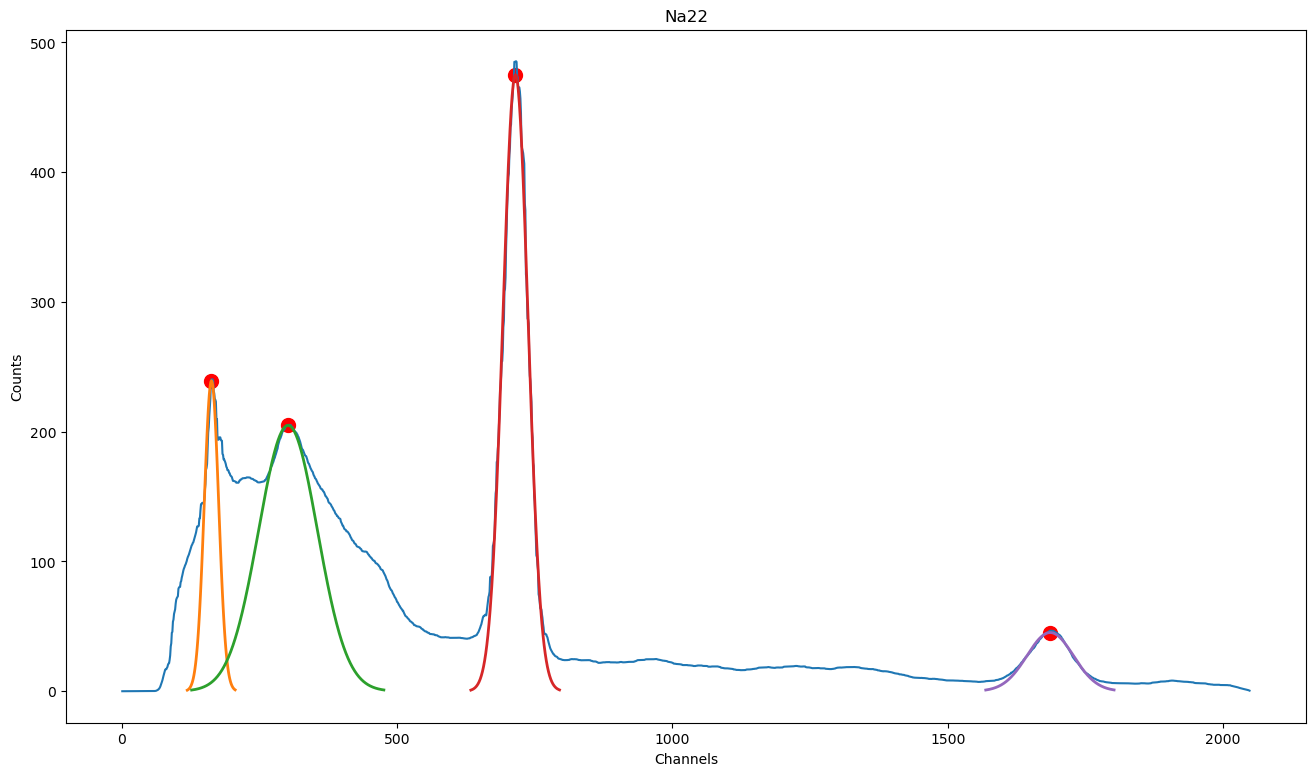

Peak #0:
Channel = 163, Count = 239
Peak #1:
Channel = 302, Count = 204
Peak #2:
Channel = 715, Count = 475
Peak #3:
Channel = 1686, Count = 45


In [76]:
Channels, Counts = readCSV('na22.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)
# Channels, Counts= Channels[:700], Counts[:700]

plt.figure(figsize=[16, 9])
plt.title("Na22")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=20, width=10)
Maxes = []
Maxes.append(processPeak(Channels,Counts, PeaksX, 0, 0.2))
Maxes.append(processPeak(Channels,Counts, PeaksX, 1, 0.2))
Maxes.append(processPeak(Channels,Counts, PeaksX, 2, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 3, 0.8))
plt.scatter(PeaksX, Maxes, color='red', s=100)
plt.savefig('na22.png')
plt.show()
printPeaks(PeaksX, Maxes)

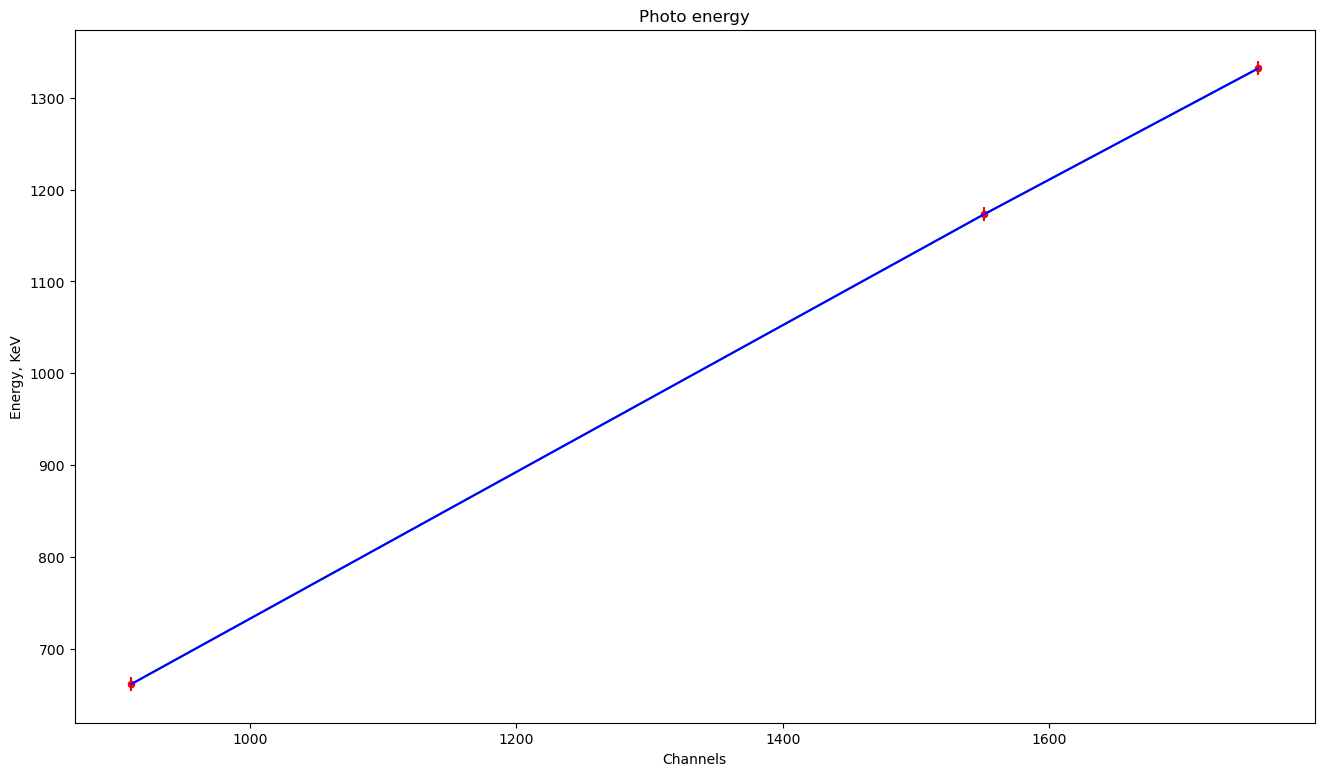

Linear fit: E = 0.79*channel -60.9
Error(b) = 7.68


In [102]:
# Process Photo peaks data
Channels = [911, 1551, 1757]
Energy = [661.7, 1173, 1332]
Res = sp.stats.linregress(Channels, Energy)
k, b, Errs = Res.slope, Res.intercept, Res.intercept_stderr
plt.figure(figsize=[16, 9])
plt.title("Photo energy")
plt.xlabel("Channels")
plt.ylabel("Energy, KeV")
plt.plot(Channels, Energy)
plt.scatter(Channels, Energy, color="red", s=20)
plt.errorbar(Channels, Energy, yerr=Errs, ecolor="red", color='Blue')
plt.savefig("channel-energy.png")
plt.show()

print (f"Linear fit: E = {k.round(2)}*channel {b.round(2):+}")
print (f"Error(b) = {Errs.round(2)}")

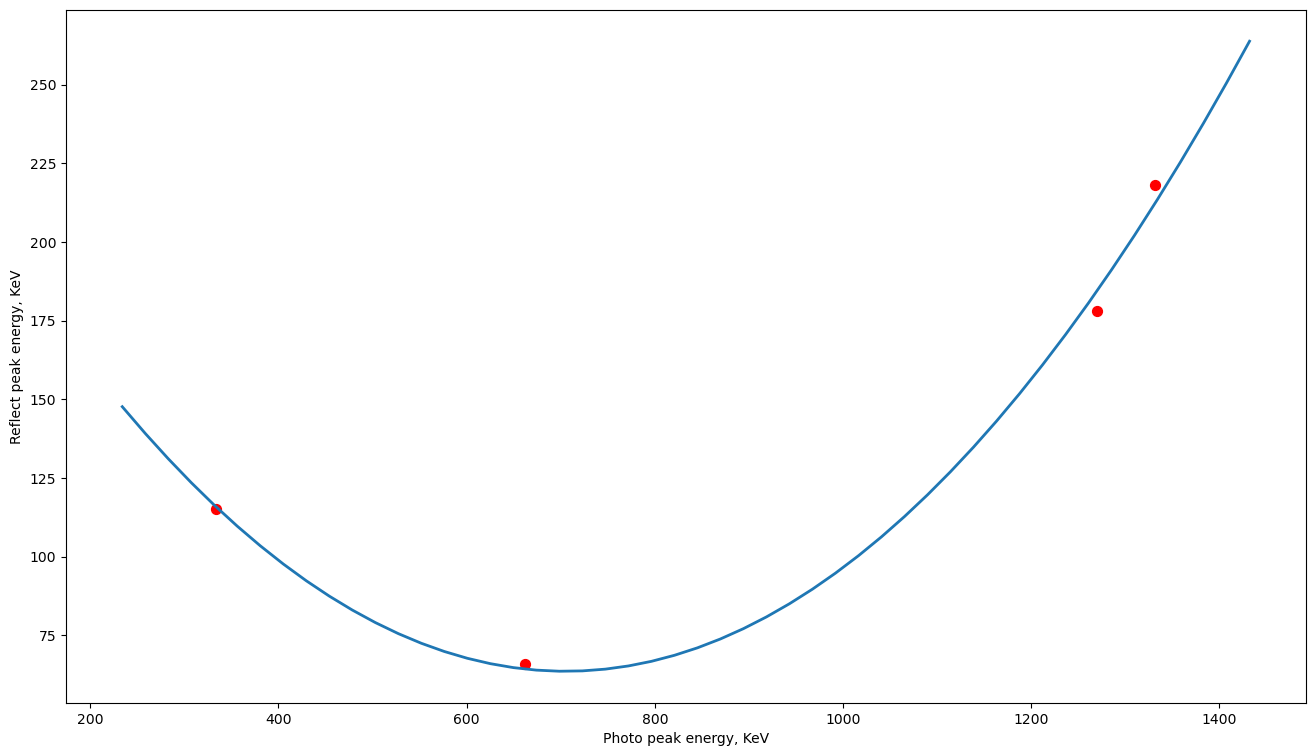

In [107]:
Photo = np.array([334, 662, 1270, 1332])
Reflect = np.array([115, 66, 178, 218])

x = np.linspace(Photo[0] - 100, Photo[-1]+100, 50) 
def fitFunc(x, a, b,c):
    return a*x**2 + b*x +c
POpt, PCov = sp.optimize.curve_fit(fitFunc, Photo, Reflect)
plt.figure(figsize=[16, 9])
plt.xlabel("Photo peak energy, KeV")
plt.ylabel("Reflect peak energy, KeV")
plt.plot(x, fitFunc(x, *POpt), linewidth=2)
plt.scatter(Photo, Reflect, color="red", s=50)
plt.savefig("photo-reflect.png")
plt.show()